### Problem Statement
- **Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like Apple, Alienware, HP etc.**
- **He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things.**
- **Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS etc) and its selling price. But he is not so good at Data Mining.**
- **To solve this problem he already asked his Data Engineering team to collect laptop data from various competitors.**
- **Now he needs your (i.e Data Scientist’s) help to solve the following problem.**

#### Step- 1 (Data Analysis and Mining)
- Musk’s Requirements 
    1. Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction.
    2. Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.


#### Sprint - 2 (ML Model Tuning)
- Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.
    1. First try to check if the models you have created are a best fit or not.
    2. See if applying cross validation helps improve your models performance.

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.max_colwidth=10000000

In [3]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\innomatics\laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,"₹49,990","AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty"
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty


In [4]:
df.shape

(720, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


### MRP column need to in numerical type

In [6]:
df['MRP'] = df['MRP'].apply(lambda x : x.replace('₹', '').replace(',', '')).astype(int)
df['MRP'][:5]

0    36990
1    39990
2    32990
3    49990
4    49990
Name: MRP, dtype: int32

### Extract Processor, RAM detail, Operating System, Storage, Brand from Features column

In [7]:
import re

In [8]:
regex = r'^\w+'
df['Brand']=df['Product'].apply(lambda x : re.findall(regex, x))
df['Brand']= df['Brand'].apply(lambda x : ''.join(x))

In [9]:
regex= r'^(?:AMD|Intel|M1|Apple)[\s\w]+Processor'
df['Processor Type']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Processor Type']=df['Processor Type'].apply(lambda x : ''.join(x))
df['Processor Type']=df['Processor Type'].apply(lambda x: x.replace(" Processor", ""))

In [10]:
regex= r'[\d]+[\s]bit[\s\w]+Operating System|[\(Windows)\d\s]+Operating System|[\(Chrome|Mac OS)]+Operating System'
df['Operating System']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Operating System']=df['Operating System'].apply(lambda x : ''.join(x))
df['Operating System']=df['Operating System'].apply(lambda x: x.replace(" Operating System", ""))

In [11]:
regex = r'\d+\sGB[\s\w]+RAM'
df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))

In [12]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Storage']=df['Storage'].apply(lambda x : ''.join(x))

In [13]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor Type,Operating System,RAM,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel Core i3,64 bit Windows 11,8 GB DDR4 RAM,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel Core i3,64 bit Windows 11,8 GB DDR4 RAM,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty,ASUS,Intel Core i3,64 bit Windows 11,8 GB DDR4 RAM,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,49990,"AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty",HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10,8 GB DDR4 RAM,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty,ASUS,Intel Core i5,Windows 11,8 GB DDR4 RAM,512 GB SSD


### Data Preprocessing and Cleaning

### Brand column

In [14]:
df['Brand'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

**There are 15 different brand laptops.**

### Processor Type column

In [15]:
df['Processor Type'].unique()

array(['Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5', '',
       'AMD Ryzen 7 Quad Core', 'AMD Ryzen 5 Quad Core',
       'AMD Ryzen 9 Octa Core', 'AMD Ryzen 7 Octa Core', 'Apple M1',
       'Intel Celeron Dual Core', 'AMD Ryzen 3 Dual Core',
       'AMD Athlon Dual Core', 'AMD Ryzen 3 Quad Core', 'Apple M2',
       'Intel Celeron Quad Core', 'Intel Core i7', 'Apple M1 Pro',
       'Apple M1 Max', 'Intel Core i9', 'Intel Pentium Silver',
       'AMD Ryzen 5 Dual Core', 'Intel Pentium Quad Core',
       'AMD Dual Core', 'AMD Ryzen 3 Hexa Core'], dtype=object)

**There are some rows missing the Processor type. Fill this with suitable processor type.**

In [16]:
df[df['Processor Type']=='']

,Product,Rating,MRP,Feature,Brand,Processor Type,Operating System,RAM,Storage
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) D560841WIN9S Thin and Ligh...,4.3,38990,"Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6"" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System1 TB HDD|256 GB SSD39.62 cm (15.6 inch) Display1 YEAR",DELL,,Windows 11,8 GB DDR4 RAM,1 TB HDD256 GB SSD
8,realme Book (Slim) Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin and Light Laptop,4.4,46990,"Stylish & Portable Thin and Light Laptop14 inch 2K QHD, IPS LCD Display ( 400nits peak brightness, 100% sRGB, 3:2 aspect ratio, Full Vision Display)Finger Print Sensor for Faster System AccessLight Laptop without Optical Disk DriveIntel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System256 GB SSD35.56 cm (14 inch) DisplayNA1 Year Domestic Warranty",realme,,64 bit Windows 10,8 GB DDR4 RAM,256 GB SSD
29,realme Book (Slim) Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin and Light Laptop,4.4,46990,"Stylish & Portable Thin and Light Laptop14 inch 2K QHD, IPS LCD Display ( 400nits peak brightness, 100% sRGB, 3:2 aspect ratio, Full Vision Display)Finger Print Sensor for Faster System AccessLight Laptop without Optical Disk DriveIntel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System256 GB SSD35.56 cm (14 inch) DisplayNA1 Year Domestic Warranty",realme,,64 bit Windows 10,8 GB DDR4 RAM,256 GB SSD
33,acer Aspire 7 Ryzen 5 Hexa Core AMD R5-5500U - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA G...,4.4,47990,"Free upgrade to Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayAcer Collection , Acer Product Registration, Acer Care Center, Quick Access1 Year International Travelers Warranty (ITW)",acer,,64 bit Windows 11,8 GB DDR4 RAM,512 GB SSD
53,realme Book(Slim) Intel Evo Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home) RMNB1002 Thin and Lig...,4.4,59990,Powered by 11th Gen Intel Evo Core i5 ProcessorMicrosoft Office 2019 Home & Student IncludedStylish Thin and Light Laptop without Optical Disk DriveIntel Core i5 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD35.56 cm (14 inch) DisplayMicrosoft Office 2019 Home & Student1 Year Domestic Warranty,realme,,64 bit Windows 10,8 GB DDR4 RAM,512 GB SSD
54,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce GTX 165...,4.4,47990,"Free upgrade to Windows 11 when availableIntel Core i5 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayQuick Access, Acer Care Center, Acer Product Registration, Acer Collection1 Year International Travelers Warranty",acer,,64 bit Windows 10,8 GB DDR4 RAM,512 GB SSD
69,DELL Ryzen 5 Hexa Core AMD R5-5600H - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce R...,4.6,70990,"Processor: AMD Ryzen R5-5600H (3.30 GHz up to 4.20 GHz) 16MB L3RAM & Storage: 16GB DDR4 (2 DIMM Slots) & 512GB SSDGraphics: NVIDIA GEFORCE RTX 3050 (4GB GDDR6) TGP Up To 80WDisplay: 15.6"" FHD WVA AG 250 nits 120Hz Narrow Border, Backlit Keyboard OrangeColor: Phantom Grey with specklesPorts: (1) HDMI 2.1, (2) SuperSpeed USB 2.0 Gen 1 Type-A including (1) with PowerShare, (1) SuperSpeed USB 3.2, (1) USB-C Data/Display Port Alt-Mode, Headphone/Mic, (1) RJ45WiFi & BT: Killer Wi-Fi 6 AX1650 (2x2) and BluetoothAMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Hardware Service",DELL,,

#### Replacing all the black row in processor with the value which correspond to Processor in Feature

In [17]:
df.iloc[6,5]='Intel i3-1115G4'
df.iloc[8,5]='Intel Core i3'
df.iloc[29,5]='Intel Core i3'
df.iloc[33,5]='AMD Ryzen 5 Hexa Core'
df.iloc[53,5]='Intel Evo Core i5'
df.iloc[54,5]='Intel Core i5'
df.iloc[69,5]='AMD Ryzen R5-5600H'
df.iloc[83,5]='Qualcomm Snapdragon 7c Gen 2'
df.iloc[94,5]='Intel PQC-N5030'
df.iloc[116,5]='Gen Intel Evo Core i5'
df.iloc[122,5]='AMD Ryzen 7 Octa Core'
df.iloc[142,5]='AMD Ryzen 3 Dual Core'
df.iloc[172,5]='Intel i3-1115G4'
df.iloc[232,5]='Intel Core i7'
df.iloc[249,5]='Intel i3-1125G4'
df.iloc[253,5]='AMD Ryzen 5-3450U'
df.iloc[259,5]='Intel Core i5'
df.iloc[349,5]='Intel Core i5-1135G7'
df.iloc[355,5]='Intel Core i3-1005G1'
df.iloc[393,5]='Intel Core i5'
df.iloc[438,5]='Intel Core i5'
df.iloc[443,5]='Intel Core i7'
df.iloc[502,5]='AMD Ryzen 5 Hexa Core'
df.iloc[508,5]='Intel Core i5 Pro'
df.iloc[593,5]='Intel i7-11800H'
df.iloc[622,5]='Intel Core i7'
df.iloc[628,5]='Intel Core i9'
df.iloc[643,5]='Intel Core i7'
df.iloc[644,5]='Intel Core i5'
df.iloc[645,5]='AMD Ryzen 5 Hexa Core'
df.iloc[688,5]='Intel Core i7'
df.iloc[689,5]='Intel Core i7'

In [18]:
df['Processor Type'].unique()

array(['Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5',
       'Intel i3-1115G4', 'AMD Ryzen 7 Quad Core',
       'AMD Ryzen 5 Quad Core', 'AMD Ryzen 9 Octa Core',
       'AMD Ryzen 7 Octa Core', 'Apple M1', 'Intel Celeron Dual Core',
       'AMD Ryzen 3 Dual Core', 'AMD Athlon Dual Core',
       'Intel Evo Core i5', 'AMD Ryzen 3 Quad Core', 'Apple M2',
       'AMD Ryzen R5-5600H', 'Intel Celeron Quad Core', 'Intel Core i7',
       'Apple M1 Pro', 'Qualcomm Snapdragon 7c Gen 2', 'Intel PQC-N5030',
       'Gen Intel Evo Core i5', 'Apple M1 Max', 'Intel Core i9',
       'Intel Pentium Silver', 'Intel i3-1125G4', 'AMD Ryzen 5-3450U',
       'AMD Ryzen 5 Dual Core', 'Intel Core i5-1135G7',
       'Intel Core i3-1005G1', 'Intel Pentium Quad Core',
       'Intel Core i5 Pro', 'AMD Dual Core', 'Intel i7-11800H',
       'AMD Ryzen 3 Hexa Core'], dtype=object)

In [19]:
len(df[df['Processor Type']==''])

0

**Now no row has missing Processor Type.**

### Operating System Column

In [20]:
df['Operating System'].unique()

array(['64 bit Windows 11', '64 bit Windows 10', 'Windows 11', 'MMac OS',
       'OS', 'Windows 10', 'MChrome', '32 bit Windows 11',
       '5Operating System64 bit Windows 10', '64 bit DOS',
       ' Windows 1064 bit Windows 10', '64 bit Chrome'], dtype=object)

In [21]:
len(df[df['Operating System']==''])

0

**Replace some of Operating system with suitable name.**

In [22]:
df['Operating System'].replace({'MMac OS':'Mac', 'OS':'Mac', 'MChrome':'Chrome',
                                '5Operating System64 bit Windows 10':'Windows 10',
                               ' Windows 1064 bit Windows 10':'Windows 10',
                               '64 bit Chrome':'Chrome'}, inplace=True)

df['Operating System']=df['Operating System'].apply(lambda x: x.replace('64 bit ', '').replace('32 bit ','').replace('64 bit ',''))
df['Operating System'].unique()

array(['Windows 11', 'Windows 10', 'Mac', 'Chrome', 'DOS'], dtype=object)

### RAM column

In [23]:
df['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [24]:
df['RAM']=df['RAM'].apply(lambda x: x.replace("128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM","8 GB DDR4 RAM"))
df['RAM']=df['RAM'].apply(lambda x: x.replace("Unified Memory","Unified"))
df['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM', '32 GB Unified RAM',
       '16 GB LPDDR4 RAM', '32 GB DDR5 RAM', '8 GB DDR5 RAM',
       '32 GB DDR4 RAM', '32 GB LPDDR4X RAM', '16 GB LPDDR3 RAM'],
      dtype=object)

In [25]:
df[['RAM Size','GB', 'RAM Type', 'RAM1']]=df['RAM'].str.split(' ', expand=True)

df.drop(['GB','RAM1','RAM'], axis=1, inplace=True)
df['RAM Size']=df['RAM Size']+"GB"
df.head()

,Product,Rating,MRP,Feature,Brand,Processor Type,Operating System,Storage,RAM Size,RAM Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel Core i3,Windows 11,256 GB SSD,8GB,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel Core i3,Windows 11,512 GB SSD,8GB,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty,ASUS,Intel Core i3,Windows 11,512 GB SSD,8GB,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,49990,"AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty",HP,AMD Ryzen 5 Hexa Core,Windows 10,512 GB SSD,8GB,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty,ASUS,Intel Core i5,Windows 11,512 GB SSD,8GB,DDR4


In [26]:
df['RAM Size'].unique()

array(['8GB', '16GB', '4GB', '32GB'], dtype=object)

In [27]:
df['RAM Type'].unique()

array(['DDR4', 'DDR5', 'LPDDR4', 'Unified', 'LPDDR4X', 'LPDDR5', 'LPDDR3'],
      dtype=object)

### Storage Column

In [28]:
df['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD256 GB SSD', '1 TB SSD',
       '256 GB HDD256 GB SSD', '', '1 TB HDD', '128 GB SSD',
       '1 TB HDD512 GB SSD', '128 GB SSD1 TB HDD128 GB SSD', '2 TB SSD'],
      dtype=object)

In [29]:
df[df['Storage']=='']

,Product,Rating,MRP,Feature,Brand,Processor Type,Operating System,Storage,RAM Size,RAM Type
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (4 GB/128 GB EMMC Storage/Windows 11 Home) NP340XLA-KA1IN...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPDDR4X RAMWindows 11 Operating System35.56 cm (14 Inch) DisplayOffice Home and Student 20211 Year Onsite Warranty,SAMSUNG,Qualcomm Snapdragon 7c Gen 2,Windows 11,,4GB,LPDDR4X
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAMChrome Operating System35.56 cm (14 Inch) Display1 Year Carry-in Warranty,Lenovo,Intel Celeron Dual Core,Chrome,,4GB,DDR4
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAMChrome Operating System35.56 cm (14 Inch) Display1 Year Carry-in Warranty,Lenovo,Intel Celeron Dual Core,Chrome,,4GB,DDR4
345,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/32 GB EMMC Storage/Chrome OS) C214MA-BU0704 Chrom...,4.0,14990,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Intel Celeron Dual Core,Chrome,,4GB,LPDDR4
509,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chrom...,4.0,24390,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System39.62 cm (15.6 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Intel Celeron Dual Core,Chrome,,4GB,LPDDR4
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ011W Thin and L...,4.5,21990,Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 11 Operating System29.46 cm (11.6 Inch) Display1 Year Onsite warranty,ASUS,Intel Celeron Dual Core,Windows 11,,4GB,DDR4
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ012W Thin and L...,4.0,19990,Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 11 Operating System29.46 cm (11.6 Inch) Display1 Year Onsite warranty,ASUS,Intel Celeron Dual Core,Windows 11,,4GB,DDR4
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual Core - (4 GB/128 GB EMMC Storage/Chrome OS) CB 11IJL6 Ch...,3.6,28490,Intel Celeron Dual Core Processor4 GB LPDDR4X RAM64 bit Chrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite�Warranty,Lenovo,Intel Celeron Dual Core,Chrome,,4GB,LPDDR4X
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C423NA-EC0521 Chromebook,4.1,25990,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System35.56 cm (14 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Intel Celeron Dual Core,Chrome,,4GB,LPDDR4
715,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Intel Celeron Dual Core,Chrome,,4GB,LPDDR4


In [30]:
len(df[df['Storage']==''])

10

**These are 10 missing rows in the Storage Column, fill these rows with suitable value.**

In [31]:
df.iloc[83,7]='128GB EMMC'
df.iloc[89,7]='64GB EMMC'
df.iloc[96,7]='64GB EMMC'
df.iloc[345,7]='32GB EMMC'
df.iloc[509,7]='64GB EMMC'
df.iloc[544,7]='64GB EMMC'
df.iloc[559,7]='64GB EMMC'
df.iloc[632,7]='128GB EMMC'
df.iloc[695,7]='64GB EMMC'
df.iloc[715,7]='64GB EMMC'

In [32]:
len(df[df['Storage']==''])

0

In [33]:
df['Storage'].replace({'256 GB SSD':'256GB SSD'}, inplace=True)
df['Storage'].replace({'512 GB SSD':'512GB SSD'}, inplace=True)
df['Storage'].replace({'1 TB SSD':'1TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD':'128GB SSD'}, inplace=True)
df['Storage'].replace({'2 TB SSD':'2TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD256 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'256 GB HDD256 GB SSD':'256GB HDD'}, inplace=True)
df['Storage'].replace({'1 TB HDD512 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD1 TB HDD128 GB SSD':'1TB HDD'}, inplace=True)

In [34]:
df[['Disc Size','Disc Type']]=df['Storage'].str.split(' ', expand=True)

df.drop(['Storage'], axis=1, inplace=True)
df.head()

,Product,Rating,MRP,Feature,Brand,Processor Type,Operating System,RAM Size,RAM Type,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel Core i3,Windows 11,8GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel Core i3,Windows 11,8GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty,ASUS,Intel Core i3,Windows 11,8GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,49990,"AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty",HP,AMD Ryzen 5 Hexa Core,Windows 10,8GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty,ASUS,Intel Core i5,Windows 11,8GB,DDR4,512GB,SSD


In [35]:
df['Disc Size'].unique()

array(['256GB', '512GB', '1TB', '128GB', '64GB', '32GB', '2TB'],
      dtype=object)

In [36]:
df['Disc Type'].unique()

array(['SSD', 'HDD', 'EMMC'], dtype=object)

### Final Cleaned Data

In [37]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor Type,Operating System,RAM Size,RAM Type,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel Core i3,Windows 11,8GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel Core i3,Windows 11,8GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty,ASUS,Intel Core i3,Windows 11,8GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,49990,"AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty",HP,AMD Ryzen 5 Hexa Core,Windows 10,8GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty,ASUS,Intel Core i5,Windows 11,8GB,DDR4,512GB,SSD


### Exploratory Data Analysis

In [38]:
df.isna().sum()

Product               0
Rating              139
MRP                   0
Feature               0
Brand                 0
Processor Type        0
Operating System      0
RAM Size              0
RAM Type              0
Disc Size             0
Disc Type             0
dtype: int64

#### Replace missing rating rows with Median of rating

In [39]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df.Rating.isna().sum()

0

### Unique values and value count in Each column

In [40]:
cols=['Brand','Processor Type','Operating System','RAM Size','RAM Type','Disc Size','Disc Type']

for col in cols:
    print("{} has {} unique values".format(col, df[col].nunique()))
    print()
    print("Unique values are\n {}".format(df[col].unique()))
    print()
    print("Value counts\n {}".format(df[col].value_counts()))
    print('*-'*60)
    print()

Brand has 16 unique values

Unique values are
 ['Lenovo' 'ASUS' 'HP' 'DELL' 'RedmiBook' 'realme' 'acer' 'MSI' 'APPLE'
 'Infinix' 'SAMSUNG' 'Ultimus' 'Vaio' 'GIGABYTE' 'Nokia' 'ALIENWARE']

Value counts
 ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: Brand, dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

Processor Type has 35 unique values

Unique values are
 ['Intel Core i3' 'AMD Ryzen 5 Hexa Core' 'Intel Core i5' 'Intel i3-1115G4'
 'AMD Ryzen 7 Quad Core' 'AMD Ryzen 5 Quad Core' 'AMD Ryzen 9 Octa Core'
 'AMD Ryzen 7 Octa Core' 'Apple M1' 'Intel Celeron Dual Core'
 'AMD Ryzen 3 Dual Core' 'AMD Athlon Dual Core' 'Intel Evo Core i5'
 'AMD Ryzen 3 Quad Core' 'Apple M2' 'AMD Ry

### Analysis of MRP column

In [41]:
print("Maximum", df['MRP'].max())
print("Minimum", df['MRP'].min())
print("Mean", df['MRP'].mean())
print("Median", df['MRP'].median())
print("Standard Deviation", df['MRP'].std())

Maximum 434830
Minimum 14990
Mean 81605.8375
Median 59990.0
Standard Deviation 61552.95510244973


**Difference between Mean and median is high, hence there might be Outliers in the MRP column.**

### Outlier Detection

<AxesSubplot:ylabel='Frequency'>

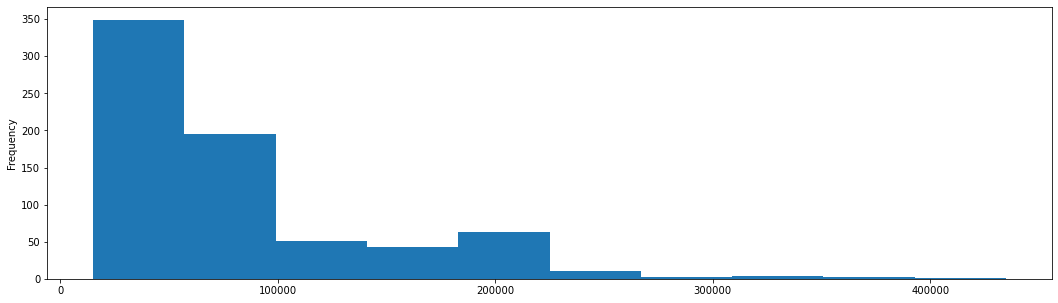

In [42]:
df['MRP'].plot(kind='hist', figsize=(18,5))

**Most Laptop price is in range upto 1 Lakh.**

<AxesSubplot:>

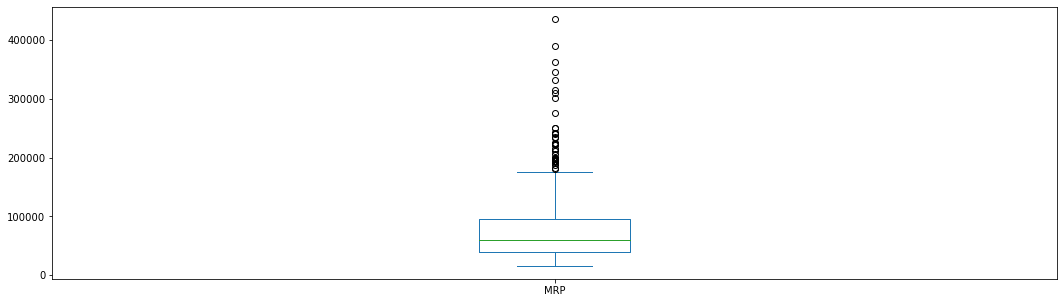

In [43]:
df['MRP'].plot(kind='box', figsize=(18,5))

**There are some laptop prices which are far away from group of data, Each data point is important so we will take transformation of this column.**

### Relation between Brand and MRP

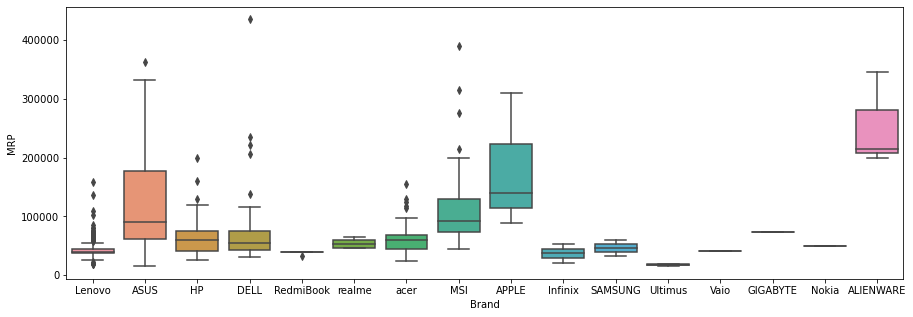

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.boxplot(x='Brand', y ='MRP', data=df);

**Price for laptop brand ALIENWARE is ranges approximetely from 2 Lakh to 3.5 Lakh, these are costiest laptops.**

### Relation between Processor Type and MRP

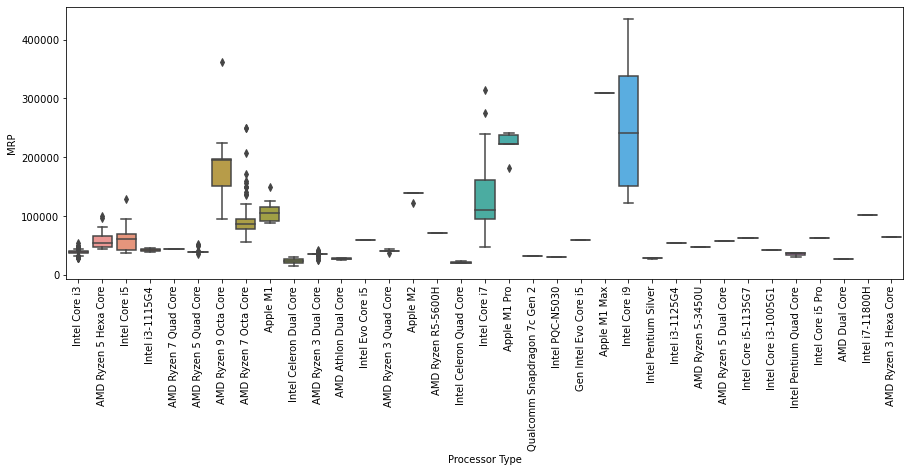

In [45]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Processor Type', y ='MRP', data=df)
plt.xticks(rotation=90);

**Intel core i9 peocessor laptop has broad MRP range.**

### Relation between Operating system and MRP

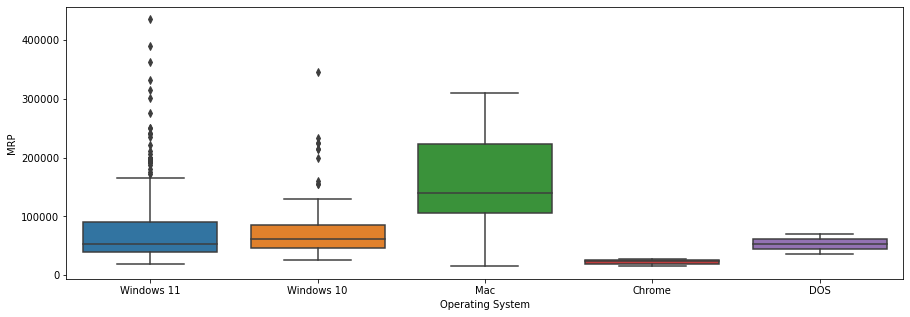

In [46]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Operating System', y ='MRP', data=df);

**64 bit Windows 11 OS has broad range of laptop price.**

### Relation between RAM type and MRP

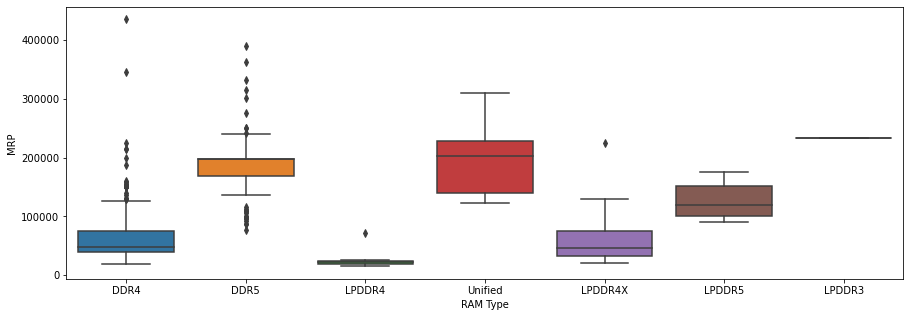

In [47]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='RAM Type', y ='MRP', data=df);

### Relation between RAM size and MRP

<AxesSubplot:xlabel='RAM Size', ylabel='MRP'>

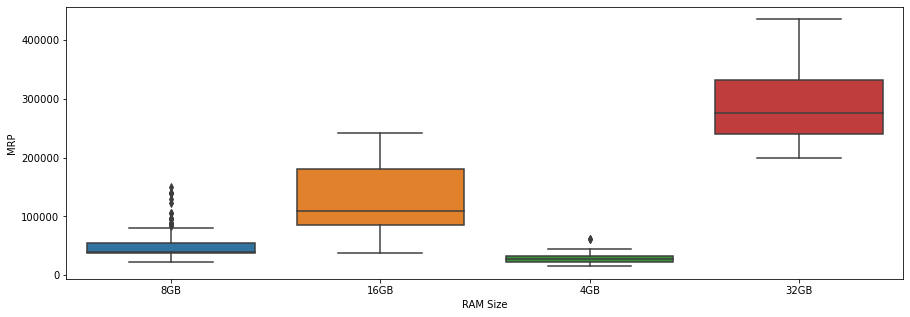

In [48]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='RAM Size', y ='MRP', data=df)

**Laptop Price are higher for high RAM.**

### Relation between Disc type and MRP

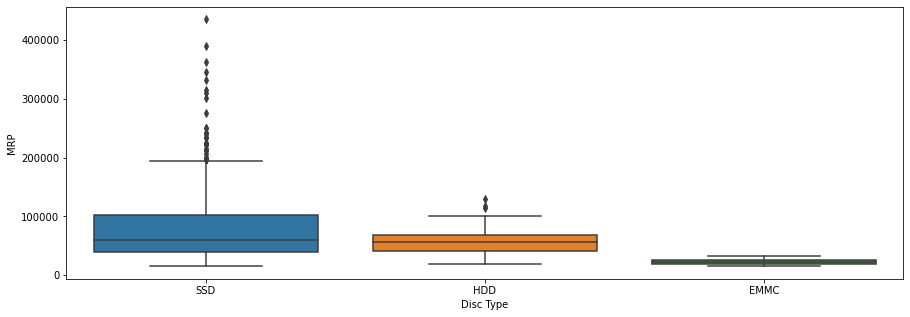

In [49]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Disc Type', y ='MRP', data=df);

### Relation between Disc size

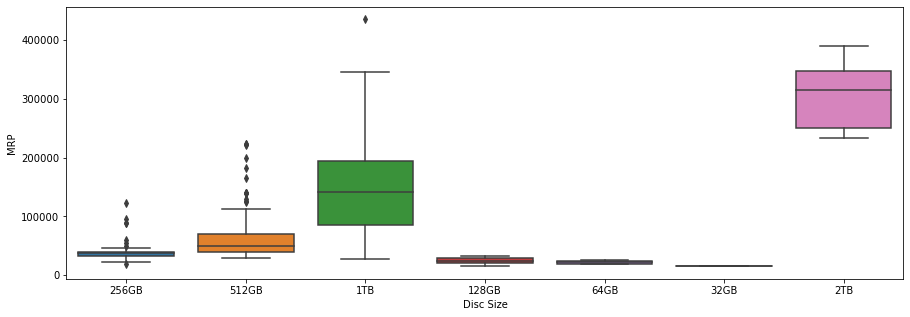

In [50]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Disc Size', y ='MRP', data=df);

### Average,Maximum and Minimum Price for different Brand

In [51]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
              min     max           mean
Brand                                   
ALIENWARE  199990  345390  253390.000000
APPLE       88990  309490  162332.105263
ASUS        14990  361990  115667.589641
DELL        30428  434830   73660.688525
GIGABYTE    73990   73990   73990.000000
HP          25990  199990   65195.557377
Infinix     20990   52990   36890.000000
Lenovo      19490  157990   45454.709184
MSI         43990  389990  121963.966667
Nokia       50490   50490   50490.000000
RedmiBook   31990   39990   39731.935484
SAMSUNG     32990   59990   46490.000000
Ultimus     15990   19990   17990.000000
Vaio        40990   40990   40990.000000
acer        24990  155490   64314.742857
realme      46990   64999   54324.833333

### Average,Maximum and Minimum Price for different Operating system

In [52]:
df.groupby(['Operating System']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
                    min     max           mean
Operating System                              
Chrome            14990   28490   22332.857143
DOS               35990   69990   52990.000000
Mac               15990  309490  148561.428571
Windows 10        25950  345390   76357.356589
Windows 11        19990  434830   81147.957219

### Average, Maximum and Minimum Price for different Processor Type

In [53]:
df.groupby('Processor Type').agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
                                 min     max           mean
Processor Type                                             
AMD Athlon Dual Core           25990   29390   27690.000000
AMD Dual Core                  27490   27490   27490.000000
AMD Ryzen 3 Dual Core          24990   42190   35400.395349
AMD Ryzen 3 Hexa Core          64590   64590   64590.000000
AMD Ryzen 3 Quad Core          37499   43667   40691.000000
AMD Ryzen 5 Dual Core          56990   56990   56990.000000
AMD Ryzen 5 Hexa Core          43990   99990   58462.490196
AMD Ryzen 5 Quad Core          35990   52575   39739.594595
AMD Ryzen 5-3450U              48184   48184   48184.000000
AMD Ryzen 7 Octa Core          55600  249990   97724.887500
AMD Ryzen 7 Quad Core          44990   44990   44990.000000
AMD Ryzen 9 Octa Core          94990  361990  179639.540230
AMD Ryzen R5-5600H             70990   70990   70990.000000
Apple M1                       88990  149990  108275.714286
Apple M1 Max                  309490  309490  309490.000000
Apple M1 Pro                  181990  241990  222490.000000
Apple M2                      121990  139990  136390.000000
Gen Intel Evo Core i5          59990   59990   59990.000000
Intel Celeron Dual Core        14990   30100   23625.500000
Intel Celeron Quad Core        20990   22990   21656.666667
Intel Core i3                  28590   54999   38818.671756
Intel Core i3-1005G1           43090   43090   43090.000000
Intel Core i5                  36990  129999   59819.303226
Intel Core i5 Pro              62190   62190   62190.000000
Intel Core i5-1135G7           63090   63090   63090.000000
Intel Core i7                  46990  314990  131628.654545
Intel Core i9                 122990  434830  257311.181818
Intel Evo Core i5              59990   59990   59990.000000
Intel PQC-N5030                30428   30428   30428.000000
Intel Pentium Quad Core        29990   36990   34656.666667
Intel Pentium Silver           27990   29490   28740.000000
Intel i3-1115G4                38990   45900   42445.000000
Intel i3-1125G4                54900   54900   54900.000000
Intel i7-11800H               101990  101990  101990.000000
Qualcomm Snapdragon 7c Gen 2   32990   32990   32990.000000

### Average, maximum and minimum Price for different RAM Type

In [54]:
df.groupby('RAM Type').agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
             min     max           mean
RAM Type                               
DDR4       19490  434830   63040.636364
DDR5       76590  389990  188289.858696
LPDDR3    233990  233990  233990.000000
LPDDR4     14990   71990   27040.000000
LPDDR4X    20990  224990   58328.081081
LPDDR5     89990  174990  125878.888889
Unified   121990  309490  193865.000000

### Average, maximum and minimum Price for different Disc Type

In [55]:
df.groupby('Disc Type').agg({'MRP' : ['min', 'max', 'mean']})

MRP                      
             min     max          mean
Disc Type                             
EMMC       14990   32990  23130.000000
HDD        19490  129999  58303.666667
SSD        15990  434830  84178.741692

### Average, maximum and minimum Price for different RAM Size

In [56]:
df.groupby('RAM Size').agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
             min     max           mean
RAM Size                               
16GB       37990  241990  125825.577947
32GB      199990  434830  288974.705882
4GB        14990   61249   29448.027027
8GB        22990  149990   48788.905707

### AverageMaximum and minimum Price for different Disc size

In [57]:
df.groupby('Disc Size').agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
              min     max           mean
Disc Size                               
128GB       15990   32990   24925.000000
1TB         27490  434830  136098.340807
256GB       19490  121990   38732.282828
2TB        233990  389990  304704.285714
32GB        14990   14990   14990.000000
512GB       29390  222990   58852.338667
64GB        19490   25990   22118.571429

### Data for Machine Learning

In [58]:
data=df[['Brand','Processor Type','Operating System','RAM Type','RAM Size','Disc Type','Disc Size','MRP']]
data.to_csv('laptop_price.csv', index=False)
data.head()

,Brand,Processor Type,Operating System,RAM Type,RAM Size,Disc Type,Disc Size,MRP
0,Lenovo,Intel Core i3,Windows 11,DDR4,8GB,SSD,256GB,36990
1,Lenovo,Intel Core i3,Windows 11,DDR4,8GB,SSD,512GB,39990
2,ASUS,Intel Core i3,Windows 11,DDR4,8GB,SSD,512GB,32990
3,HP,AMD Ryzen 5 Hexa Core,Windows 10,DDR4,8GB,SSD,512GB,49990
4,ASUS,Intel Core i5,Windows 11,DDR4,8GB,SSD,512GB,49990


## Summay of relationship between Laptop features and Laptop Price and How the Laptop Pricing works in market.
### 1. Price for laptop brand `ALIENWARE` is ranges approximetely from 2 Lakh to 3.5 Lakh, these are costiest laptops.
### 2. Average price for `ALIENWARE, APPLE, ASUS`,`MSI` laptops brand is high.
### 3. Average price is high for `Mac Operating System` laptops.
### 4. `Apple M1 Max`processor laptops has high average laptop price as compared to any other processor.
### 5.  `LPDDR3` RAM type laptops has highest average price.
### 6. `SSD` Disc type laptops has highest aaverage price.
### 7. Higher the RAM size higher the Price of laptop.
### 8. Higher the Disc size highrt the Price of laptop.
### 9. `64GB` RAM size laptops have high average price.
### 10. `2TB1` Disc size laptops have high average price.